In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [20]:
# import data
filepath = '/Users/asudler/Desktop/OU/coursework/2023/fall/PHYS-3302-ALAB1/two-slit/data/laser_run1/both_slit.csv'
pos, v1, junk, junk = np.genfromtxt(
    filepath, unpack=True,
    skip_header=1, dtype=float,
    delimiter=','
)

pos = pos * 0.001

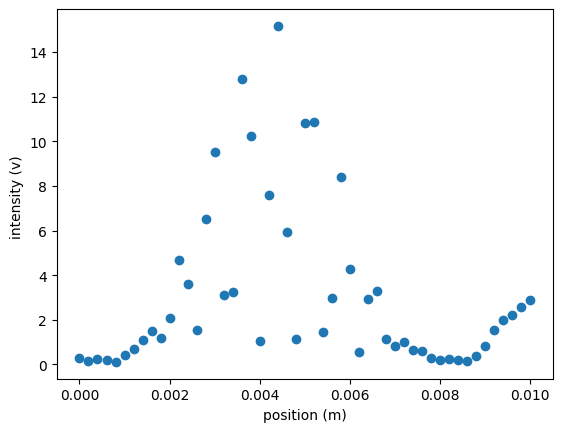

In [21]:
# check to see that data looks ok

plt.scatter(
    pos, v1
)

plt.xlabel('position (m)')
plt.ylabel('intensity (v) ')
plt.show()

In [78]:
# try to fit

def fcn(x, i0, d, a, l, wavelength, phi, bg):
    beta = ((np.pi * d)/wavelength) * np.sin(np.arctan2(x, l) + phi)
    alpha = ((np.pi * a)/wavelength) * np.sin(np.arctan2(x, l) + phi)
    return i0 * (np.cos(beta)**2 * (np.sin(alpha)/alpha)**2) + bg

[ 1.46492942e+01  3.94866788e-03  7.90259322e-04  4.05860477e+00
  7.04308406e-07 -1.08054596e-03  6.84612853e-01]


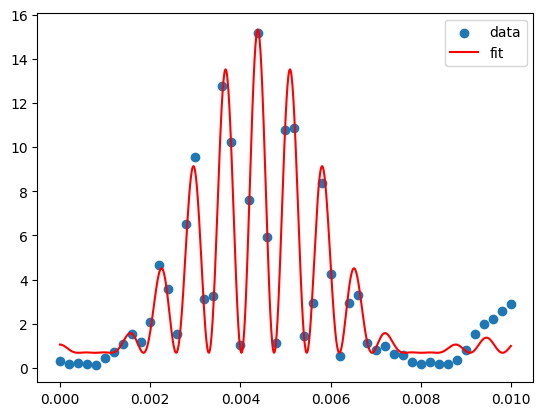

In [84]:
# guess
i0 = 15
d = 0.353e-3
a = 0.085e-3
l = 0.5
wavelength = 0.670e-6
phi = -0.0088
bg = 0.1
guess = np.array([i0, d, a, l, wavelength, phi, bg])

# fit
popt1, pcov1 = curve_fit(fcn, pos, v1, p0=guess, maxfev=100000)

print(popt1)

### plotting below

# plotting data
plt.scatter(
    pos, v1,
    label='data'
)

x = np.linspace(0,0.01,1000)

# plotting fit
plt.plot(
    x, fcn(x, *popt1),
    color='red',
    label='fit'
)

# plt.plot(
#     pos, fcn(pos, *guess),
#     color='blue',
#     label='guess'
# )

# plt.plot(
#     x, fcn(x, *guess),
#     color='blue',
#     label='guess'
# )

plt.legend()
plt.show()